## Dataset : Bank Client Data
### Model Developed By : Shaikh Kamran Ahmed

### Probleme Statement

1. Perform Exploratory Data Analysis on the dataset using python.
2. Derive insights from the dataset and visualise using python libraries (eg - matplotlib or seaborn)
3. Predict if a customer will subscribe to term deposit.


### Aim
To build a solution that should be able to predict if a customer will subscribe to term deposit.

### Procedure
- Importing and checking the dataset
- EDA
- Visualization
- Preprocessing
- Label Encoding
- One Hot Encoding
- Train Test Split
- Model Building
- Evaluation
- Final Report

In [1]:
# Importing required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Importing and checking the dataset

In [2]:
# Importing the dataset
df = pd.read_csv("C:/download/ABG IT Internship/Marketing_Campaign - Bank/campaign_data.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df = df.rename(columns={'y': 'target'})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Convert categorical columns to numeric format of dependant variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

### EDA (Exploratory Data Analysis)

In [7]:
# Shape of data
df.shape

(41188, 20)

In [8]:
# Data type of attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [9]:
# Statistical info
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [10]:
# Checking unique values in dataset
df.apply(lambda x: len(x.unique()))

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
target              2
dtype: int64

In [11]:
# Checking unique values and value count of each object variable 
for col in df.select_dtypes(include='object').columns: 
    print(col, "column")
    print("Number of unique:", df[col].nunique())
    print(df[col].value_counts(), '\n')

job column
Number of unique: 12
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital column
Number of unique: 4
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education column
Number of unique: 8
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default column
Number of unique: 3
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing column
Number of unique: 3
yes        21576
no         18622
unknown      990
Name: housing, dtype: int6

In [12]:
# Checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

#### Observation:
As we can see above that this dataset does not contain any missing or null values, so we will proceed further

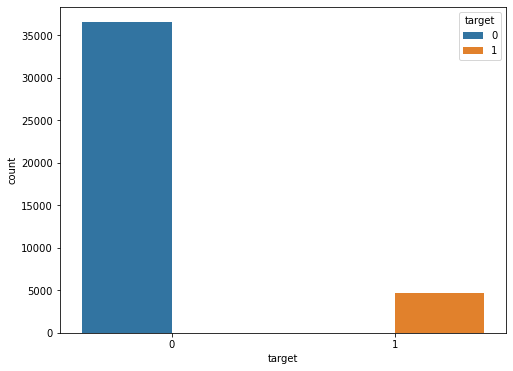

In [13]:
# Check if the dataset is balanced or not
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="target", hue="target")
plt.show()

#### Observation:
-  As we can see in above graph the data is highly imbalanced this will affect our model, so we will use ovesampling techniques to overcome this probleme later in this notebook.

#### Visualization

In [14]:
# Checking for categoricl feature
categorical_feature=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['target']))]
categorical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

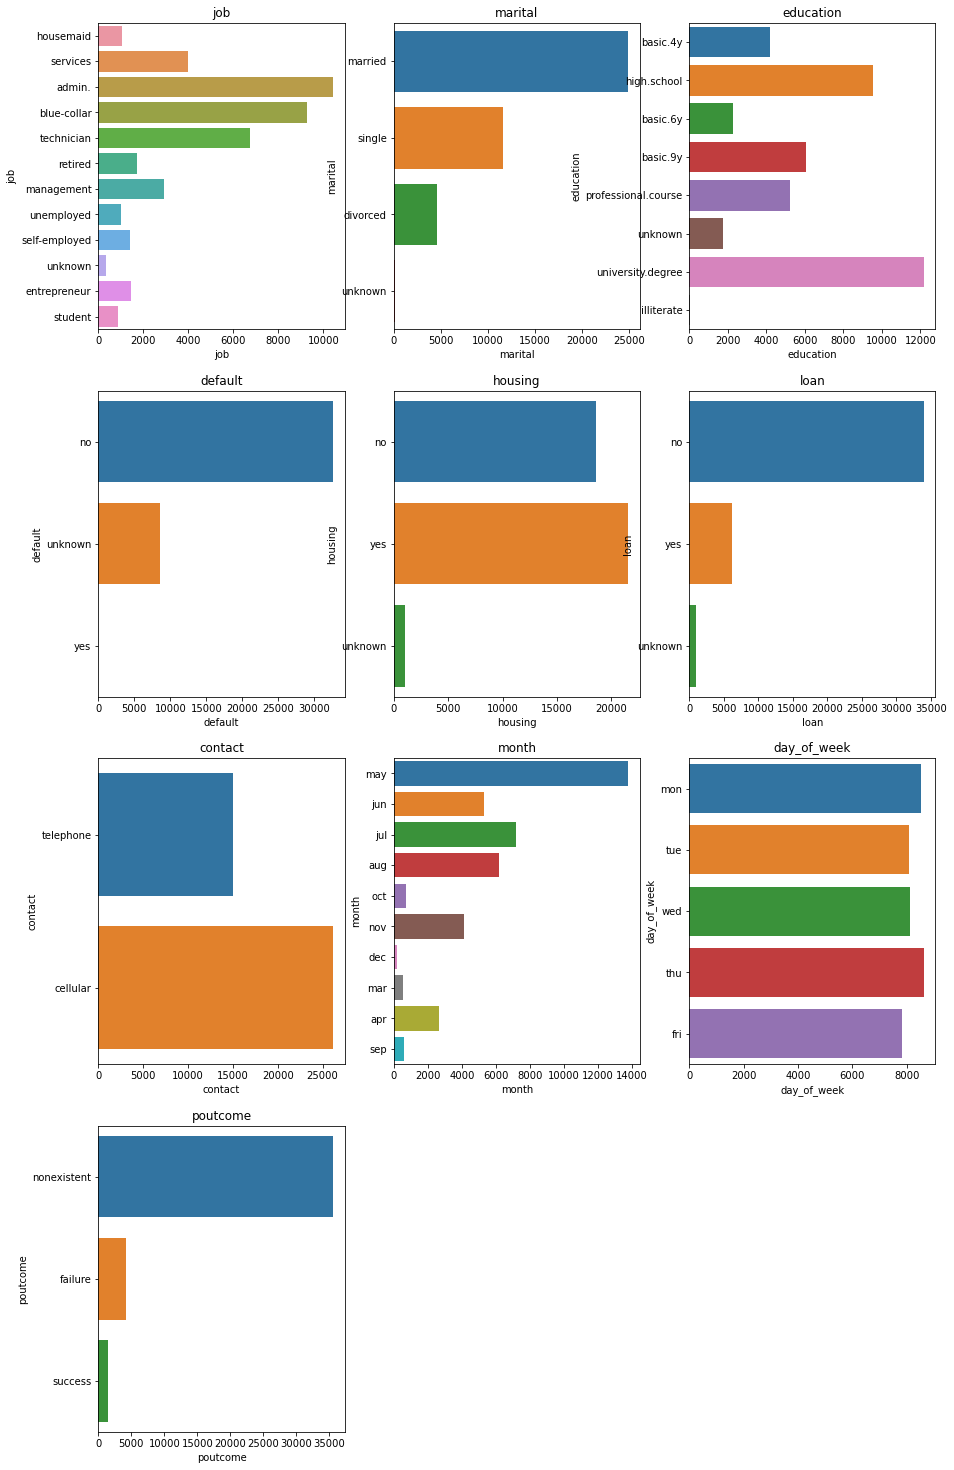

In [15]:
#checking count of each categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Observations:
- Client with job type as admin records are high in given dataset and housemaid are very less.
- Client who married are high in records in given dataset and divorced are less.
- Client who's education background is university degree are in high numbers in given dataset.
- Defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop.
- High number of clients have housing loan while very less clients have personal loans.
- Most of the clients were contacted using cellular communication.
- Data in month of may is high and less in december.

In [16]:
cat_feature=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['target']))]
cat_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

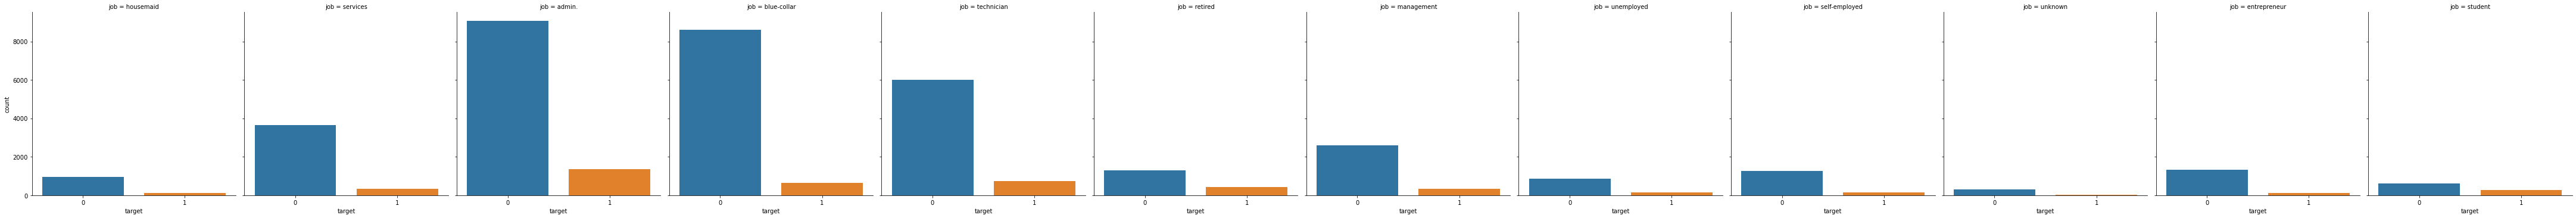

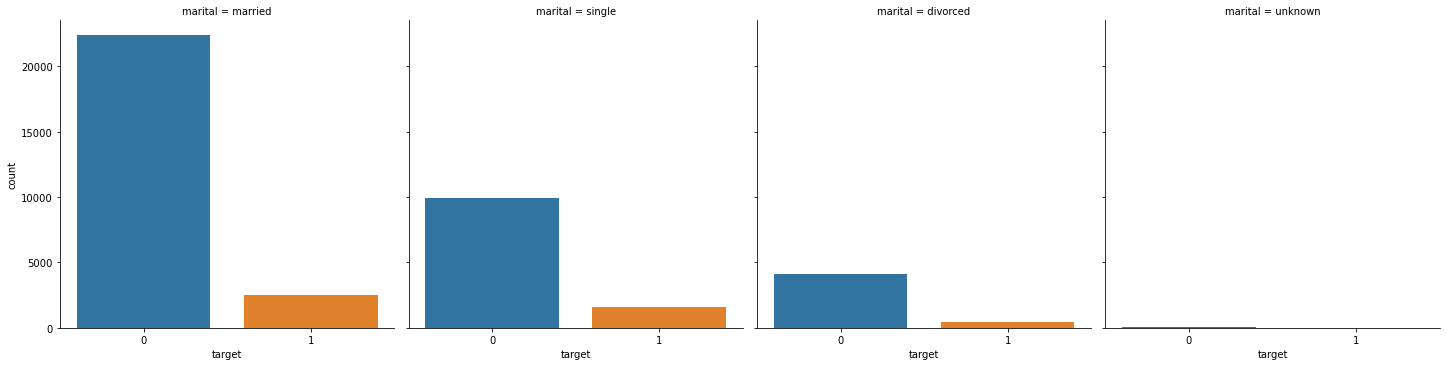

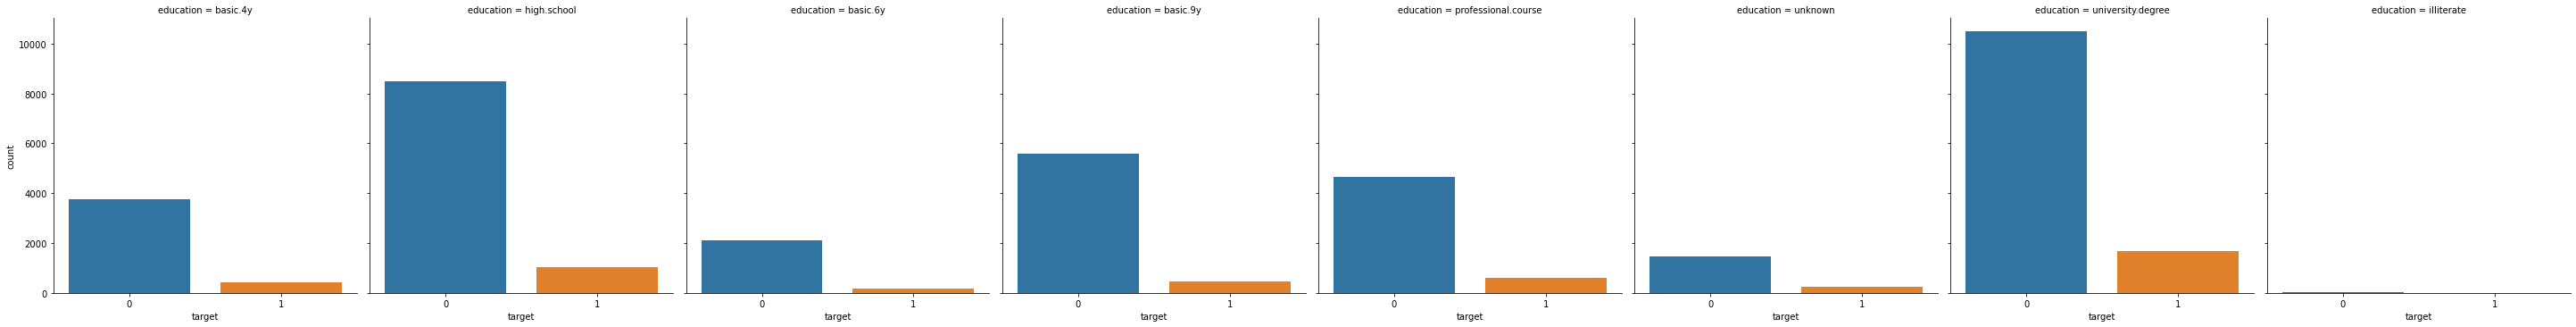

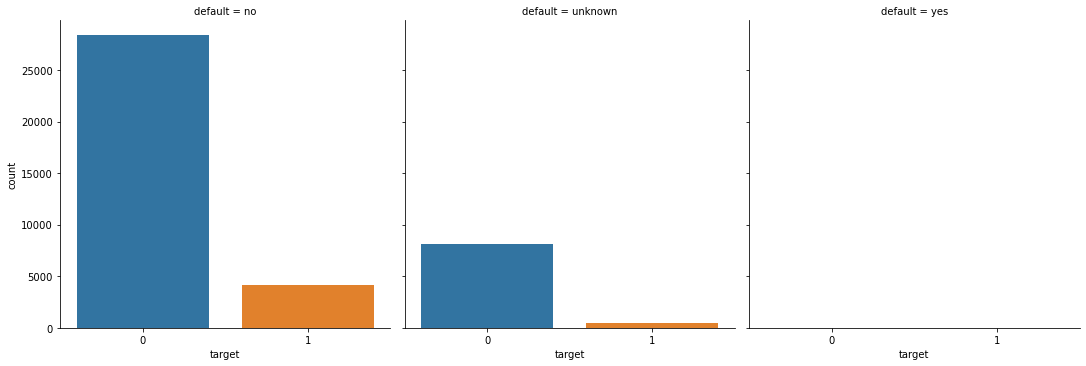

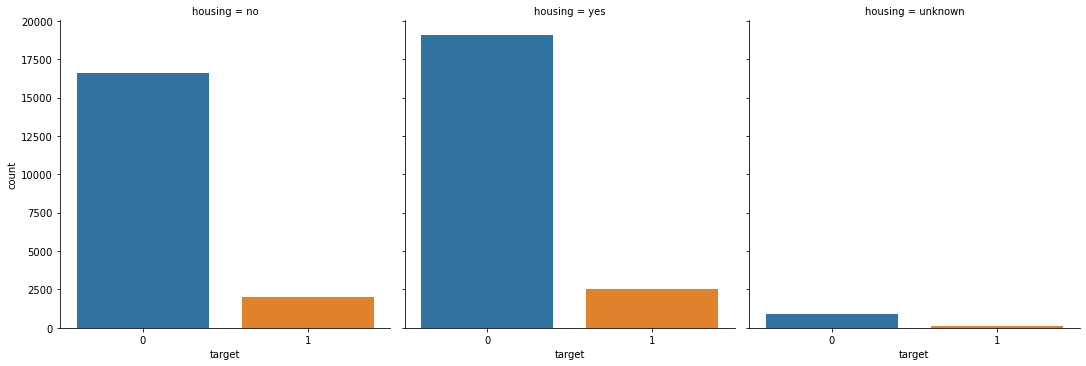

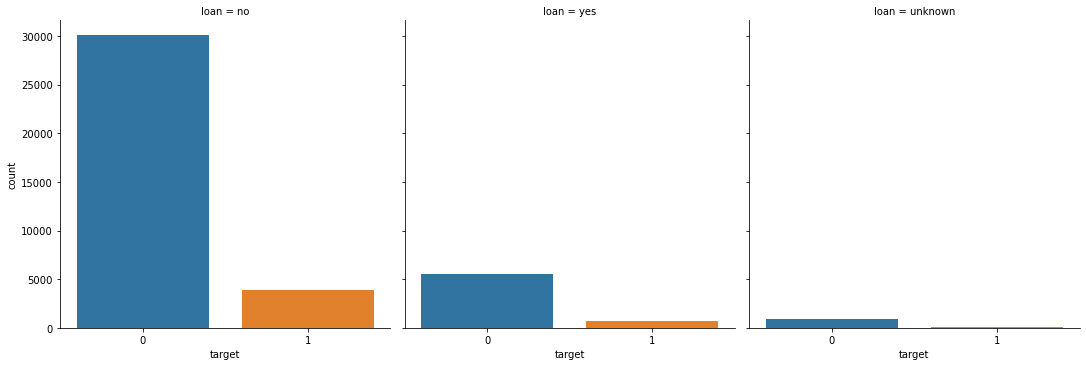

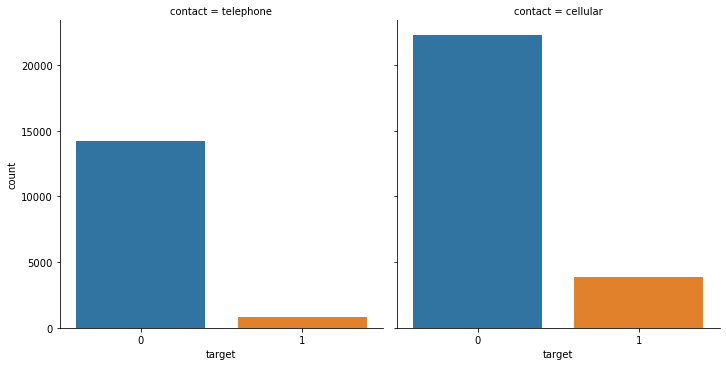

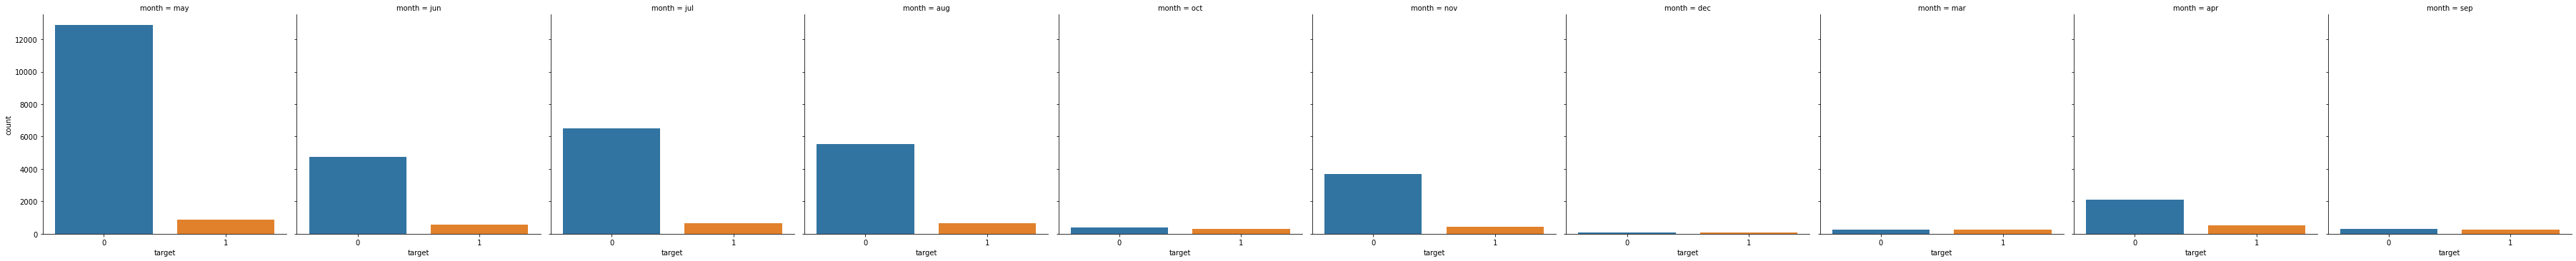

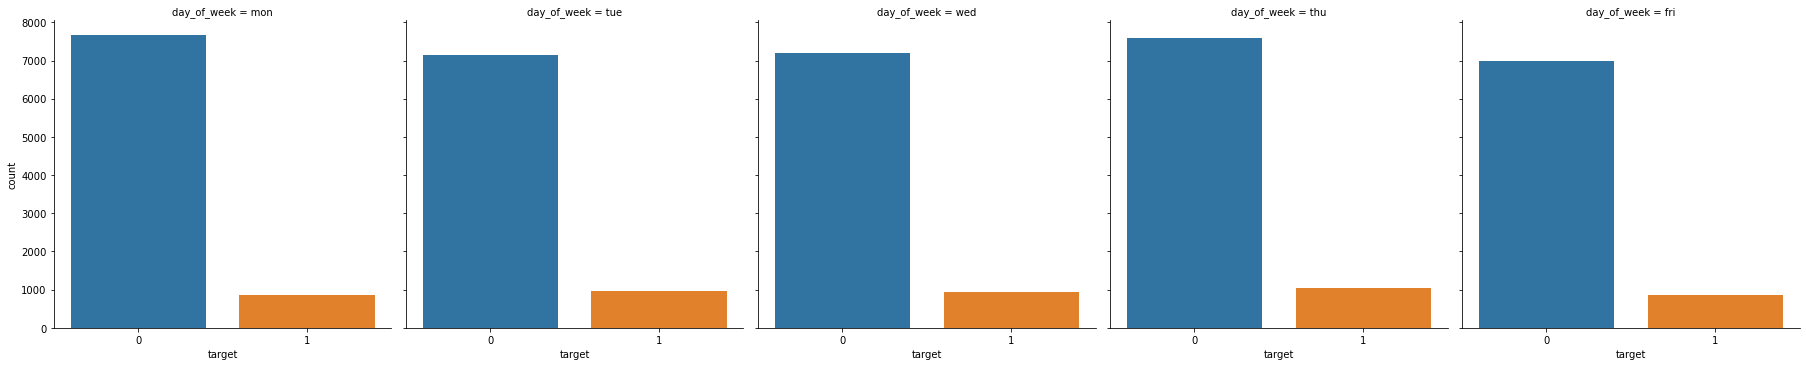

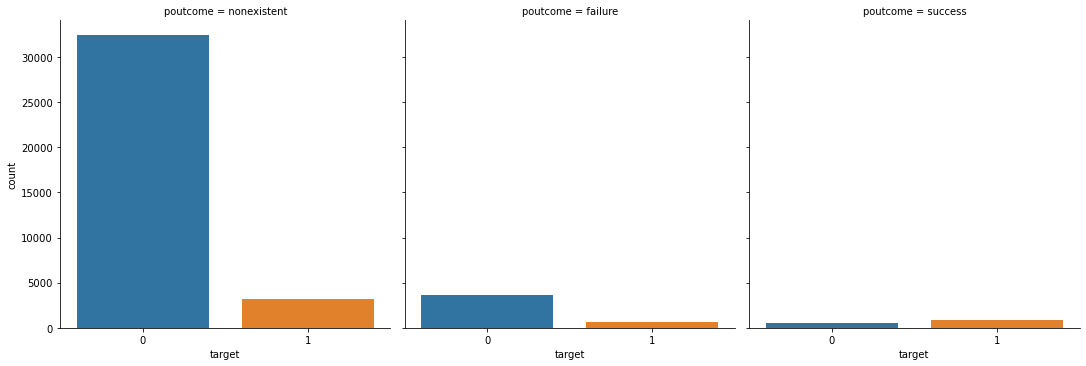

In [17]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for cat_feature in cat_feature:
    sns.catplot(x='target', col=cat_feature, kind='count', data= df)
plt.show()

In [18]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['target']))]
print(numerical_features)

['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [19]:
# List of discrete features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print(discrete_feature)

['previous', 'emp.var.rate', 'nr.employed']


In [20]:
# List of continiuos numerical features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['target']]
print(continuous_features)

['age', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


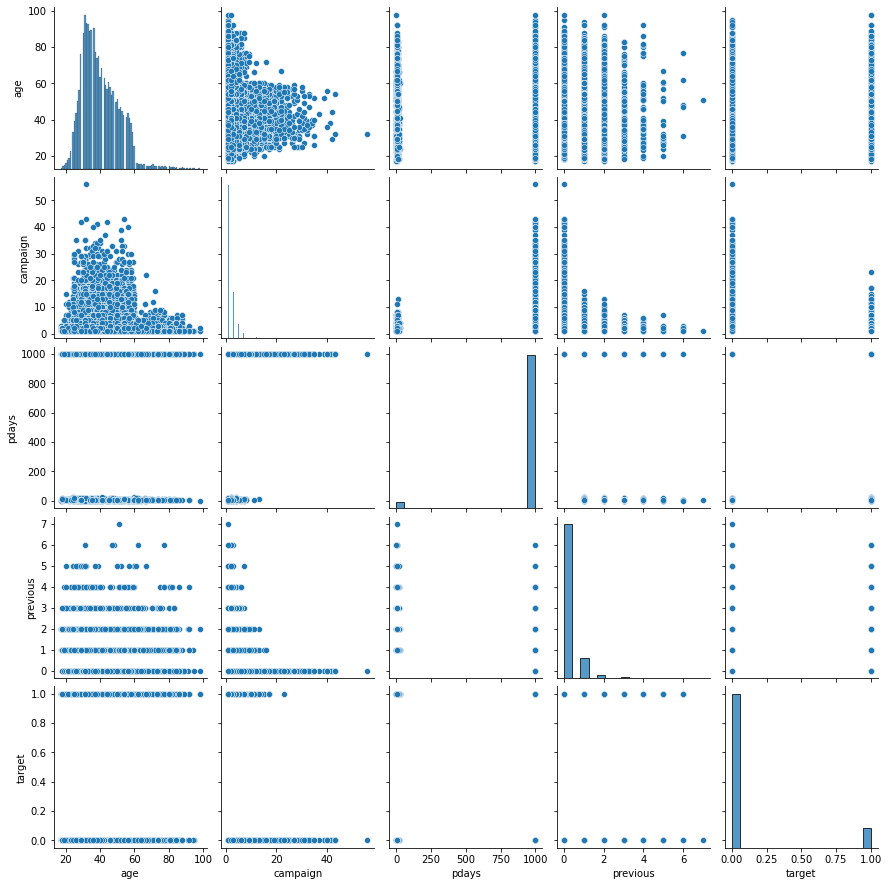

In [65]:
# Pair Plot
sns.pairplot(df)

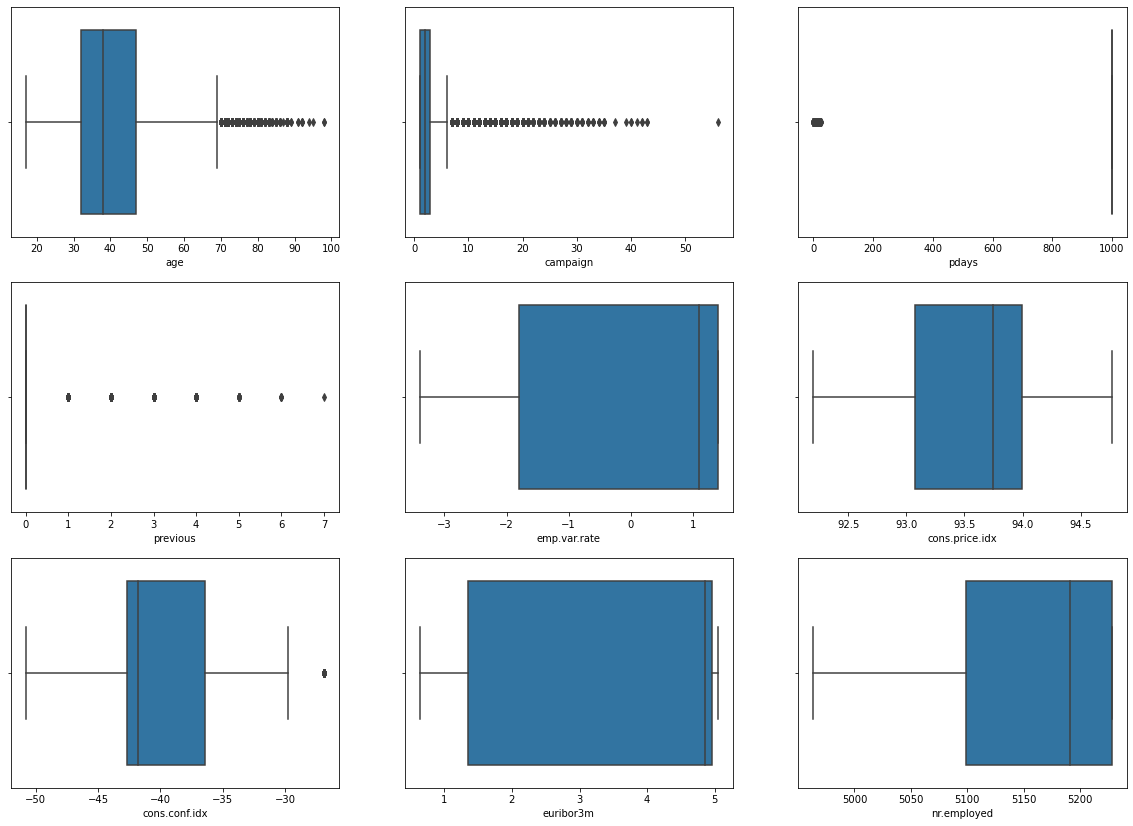

In [22]:
# Boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### Observations:
- age, campaign and pdays has some outliers, but outliers in age are acceptable as some may have the high age.

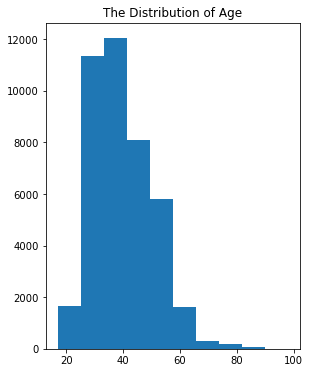

In [24]:
# Distribution of age
dist_age = plt.figure(figsize = (10,6))
ra1 = dist_age.add_subplot(1,2,1) 
ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')
plt.show()

<AxesSubplot:>

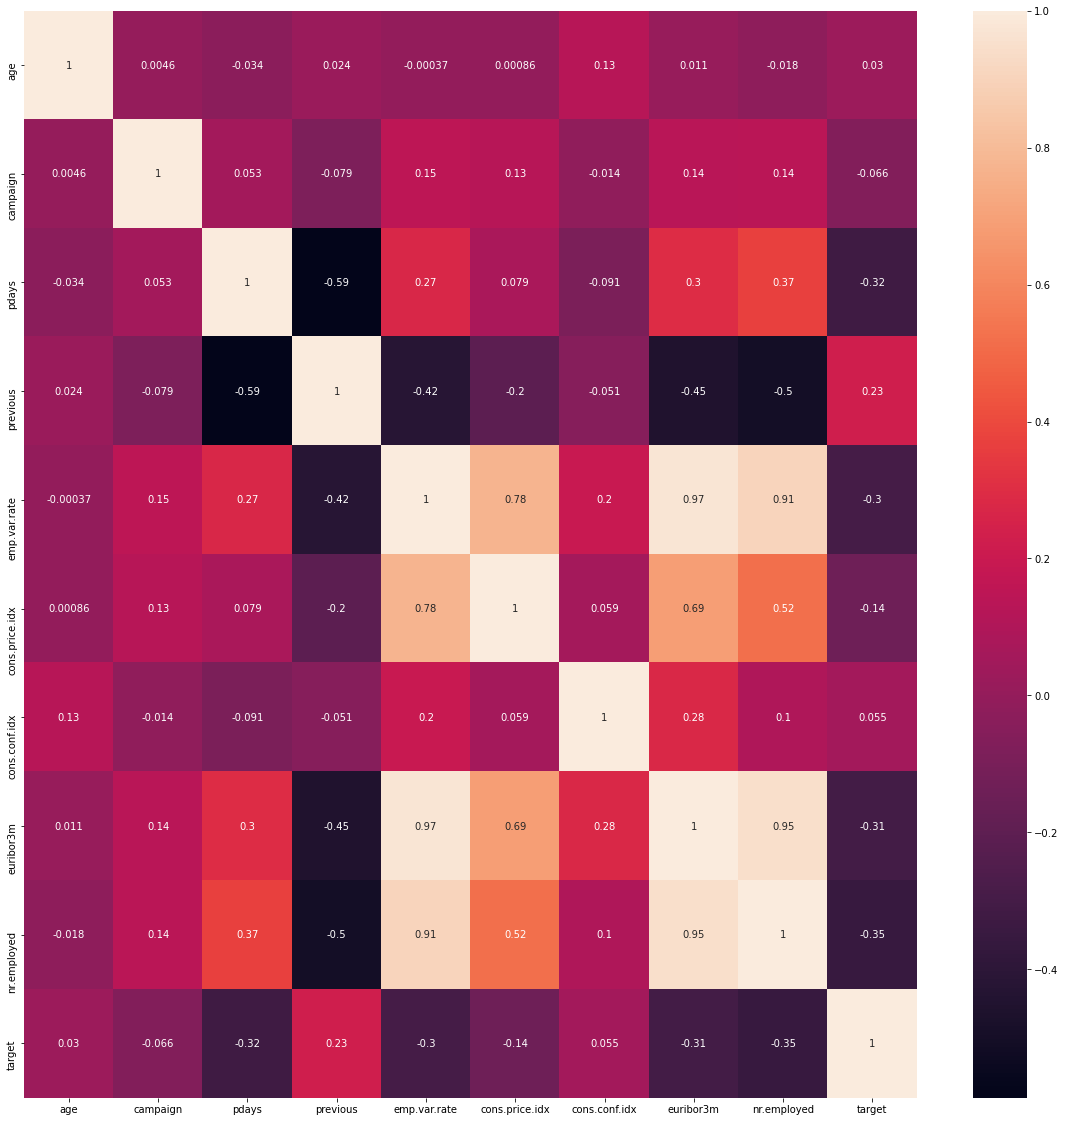

In [25]:
# Checking correlation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot =True)

### Observations:
- There are few independent variables which has high correlation to each other we will drop those variables as these variables are not good for the model.

In [26]:
# Dropping the highly correlated variables
df.drop(['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx'],axis=1,inplace = True)

In [27]:
df.shape

(41188, 15)

In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  campaign     41188 non-null  int64 
 11  pdays        41188 non-null  int64 
 12  previous     41188 non-null  int64 
 13  poutcome     41188 non-null  object
 14  target       41188 non-null  int32 
dtypes: int32(1), int64(4), object(10)
memory usage: 4.6+ MB


In [30]:
# Transforming categorical data into dummy variables
df_new = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'], drop_first = True)
df_new.head()

,age,campaign,pdays,previous,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


### Train-Test Split

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [32]:
X = df_new.drop(['target'],axis=1)
y = df_new['target']

In [33]:
#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 20)

### Model Building

#### 1. Logistic Regression

In [34]:
# Applying logistic regression
L_reg=LogisticRegression()
L_reg.fit(X_train,y_train)
pred=L_reg.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7328
           1       0.64      0.16      0.25       910

    accuracy                           0.90      8238
   macro avg       0.77      0.57      0.60      8238
weighted avg       0.87      0.90      0.87      8238



### Observation:
As we can see in above results,we get a good accuracy of 90% but we have very low recall and f1 score this is because of the imbalance probleme as we have seen earlier. With this in mind, the oversampling and standardscaler technique is implemented below to solve this issue.

In [36]:
# Implementing standardscaler
std_model=StandardScaler()
X_train_std=std_model.fit_transform(X_train)
X_test_std=std_model.transform(X_test)

We need to balance classes before testing and training.
I will use SMOTE technique to oversample the minority class

#### Oversampling: 
Overcoming imbalance problem, this method simply duplicates existing samples of a minor class. No synthetic data.

In [37]:
# Before oversampling the imbalanced data
print('X_train',X_train_std.shape)
print('y_train', y_train.shape)

X_train (32950, 47)
y_train (32950,)


In [38]:
# Oversampling the data using SMOTE technique
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_sample(X_train_std,y_train)

In [39]:
# After oversampling the data
print('X_train',X_train_smote.shape)
print('y_train', y_train_smote.shape)

X_train (58440, 47)
y_train (58440,)


In [40]:
# Fit the model
L_reg.fit(X_train_smote,y_train_smote.ravel())
prediction=L_reg.predict(X_test_std)
prediction

array([0, 0, 1, ..., 0, 0, 0])

### Evaluation

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
print("F1 score:",metrics.f1_score(y_test, prediction))

Accuracy: 0.7841709152706968
Precision: 0.27253668763102723
Recall: 0.5714285714285714
F1 score: 0.3690560681334279


In [42]:
# Print the classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      7328
           1       0.27      0.57      0.37       910

    accuracy                           0.78      8238
   macro avg       0.61      0.69      0.62      8238
weighted avg       0.86      0.78      0.81      8238



#### 2. Random Forest

In [43]:
# Fit the model
RF= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
RF.fit(X_train_smote, y_train_smote.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [44]:
# # Prediction on test data
RF_prediction = RF.predict(X_test_std)
RF_prediction

array([0, 0, 1, ..., 0, 0, 0])

### Evaluation

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, RF_prediction))
print("Precision:",metrics.precision_score(y_test, RF_prediction))
print("Recall:",metrics.recall_score(y_test, RF_prediction))
print("F1 score:",metrics.f1_score(y_test, RF_prediction))

Accuracy: 0.8806749210973537
Precision: 0.43177570093457945
Recall: 0.25384615384615383
F1 score: 0.3197231833910034


In [46]:
# Print the classification report
print(classification_report(y_test, RF_prediction))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7328
           1       0.43      0.25      0.32       910

    accuracy                           0.88      8238
   macro avg       0.67      0.61      0.63      8238
weighted avg       0.86      0.88      0.87      8238



### 3. SVM

In [47]:
from sklearn import svm,preprocessing

kernals=['rbf']
kernals

for k in kernals:
    m=svm.SVR(kernel=k).fit(X_train_smote, y_train_smote.ravel())
    accuracy=metrics.accuracy_score(y_test, RF_prediction)
    print('kernal={} ,Accuracy{}'.format(k,accuracy))

In [48]:
from sklearn.svm import SVC
SVM_model_rbf=SVC(kernel='rbf')
SVM_model_rbf.fit(X_train_smote, y_train_smote.ravel())

SVC()

In [49]:
# Prediction on test data
y_predicted_SVM_rbf = SVM_model_rbf.predict(X_test_std)
y_predicted_SVM_rbf

array([0, 0, 0, ..., 0, 0, 0])

### Evaluation

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_SVM_rbf))
print("Precision:",metrics.precision_score(y_test, y_predicted_SVM_rbf))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_rbf))
print("F1 score:",metrics.f1_score(y_test, y_predicted_SVM_rbf))

Accuracy: 0.8589463462005341
Precision: 0.3809073724007561
Recall: 0.44285714285714284
F1 score: 0.4095528455284553


In [50]:
# Print the classification report
print(classification_report(y_test, y_predicted_SVM_rbf))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7328
           1       0.38      0.44      0.41       910

    accuracy                           0.86      8238
   macro avg       0.66      0.68      0.66      8238
weighted avg       0.87      0.86      0.86      8238



### 4. Adaboost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
# Applying adaboost
Adaboost_model=AdaBoostClassifier(n_estimators=100)

In [54]:
# Fitting the model
Adaboost_model.fit(X_train_smote, y_train_smote.ravel())
y_predicted_Adaboost = Adaboost_model.predict(X_test_std)

### Evaluation

In [60]:
# Evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_Adaboost))
print("Precision:",metrics.precision_score(y_test, y_predicted_Adaboost))
print("Recall:",metrics.recall_score(y_test, y_predicted_Adaboost))
print("F1 score:",metrics.f1_score(y_test, y_predicted_Adaboost))

Accuracy: 0.8926924010682205
Precision: 0.5254901960784314
Recall: 0.2945054945054945
F1 score: 0.3774647887323944


In [55]:
# Print the classification report
print(classification_report(y_test, y_predicted_Adaboost))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7328
           1       0.53      0.29      0.38       910

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



### Final Report

In [62]:
# creating the final report
final_report = pd.DataFrame()
final_report['Models'] = ['LogisticRegression','RandomForestClassifier','SVM_RBF','AdaBoostClassifier']
final_report['Accuracy'] = [0.7841709152706968,0.8806749210973537,0.8589463462005341,0.8926924010682205]
final_report['precision'] = [ 0.27253668763102723,0.43177570093457945, 0.3809073724007561,0.5254901960784314]
final_report['recall'] = [0.5714285714285714,0.25384615384615383,0.44285714285714284,0.2945054945054945]
final_report['f1-score'] = [0.3690560681334279,0.3197231833910034,0.4095528455284553,0.3774647887323944]
final_report

,Models,Accuracy,precision,recall,f1-score
0,LogisticRegression,0.784171,0.272537,0.571429,0.369056
1,RandomForestClassifier,0.880675,0.431776,0.253846,0.319723
2,SVM_RBF,0.858946,0.380907,0.442857,0.409553
3,AdaBoostClassifier,0.892692,0.525490,0.294505,0.377465


In [66]:
cm = sns.light_palette('navy',as_cmap=True)
colored_report = final_report.style.background_gradient(cmap=cm)
colored_report

,Models,Accuracy,precision,recall,f1-score
0,LogisticRegression,0.784171,0.272537,0.571429,0.369056
1,RandomForestClassifier,0.880675,0.431776,0.253846,0.319723
2,SVM_RBF,0.858946,0.380907,0.442857,0.409553
3,AdaBoostClassifier,0.892692,0.525490,0.294505,0.377465


### Observation:
- The dataset contained 19 features and 1 target variable for binary classification which determines if client will subscribe deposit or not
- I have done feature selection and got 14 important features.
- Then I applied various classification algorithms on the data such as Logistic Regression, Random Forest, SVM and AdaBoost
- And the best performing algorithm is adaboost.
- As it gives good result in accuracy as well as precision compare to other models. 